# Autocorrelation and Partial Autocorrelation

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import quandl
plt.style.use('seaborn-darkgrid')

In [4]:
quandl.ApiConfig.api_key = 'YM-RT4CFETsfzRzTNXKt'

In [5]:
aapl = quandl.get('WIKI/AAPL')

### Autocorrelation

$$r_1 = \displaystyle \frac{\sum_{t = 1}^{N-1}(x_t - \bar{x}_{(1)})(x_{t+1} - \bar{x}_{(2)})}{\sqrt{\sum_{t=1}^{N-1}(x_t - \bar{x}_{(2)})^2}}$$

In [6]:
recent_data = aapl['Adj. Close']['2017':]

In [7]:
from pandas.plotting import autocorrelation_plot

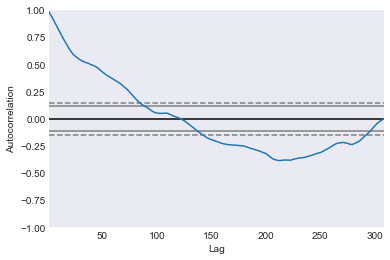

In [8]:
autocorrelation_plot(recent_data)

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

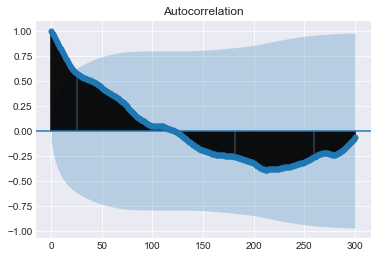

In [10]:
plot_acf(recent_data, lags=300);

Date
2018-01-03    172.23
2018-01-04    173.03
Name: Adj. Close, dtype: float64


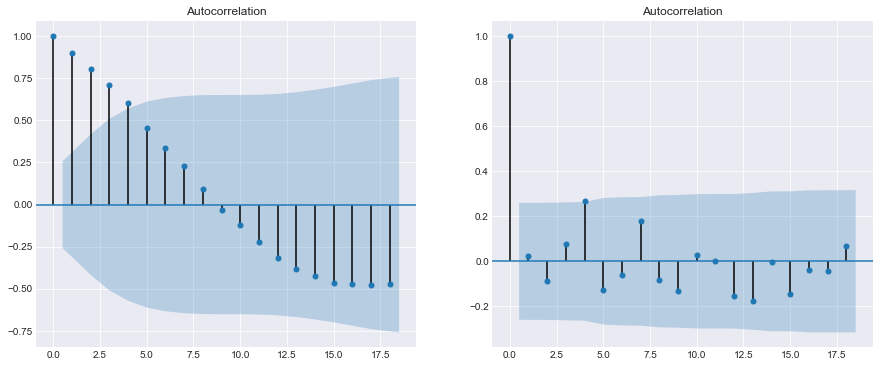

<Figure size 1080x432 with 0 Axes>

In [11]:
print(recent_data[250:].head(2))
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
plt.figure(figsize = (15, 6))
plot_acf(recent_data[250:], ax = ax[0]);
plot_acf(recent_data[250:].diff().dropna(), ax = ax[1]);

### Partial Autocorrelation

Removes effects of previous lags vs. 'Autocorrelation' which includes every lag.

#### *All content above contains my notes in -02-moving-averages* ###

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

Date
2018-01-03    172.23
2018-01-04    173.03
Name: Adj. Close, dtype: float64


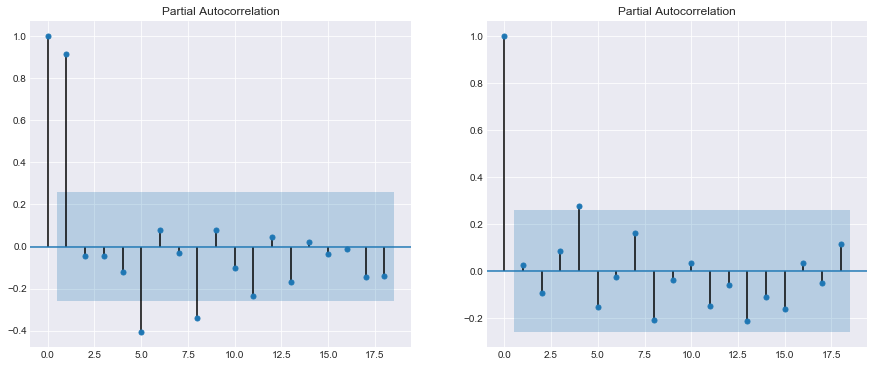

<Figure size 1080x432 with 0 Axes>

In [14]:
print(recent_data[250:].head(2))
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
plt.figure(figsize = (15, 6))
plot_pacf(recent_data[250:], ax = ax[0]);
plot_pacf(recent_data[250:].diff().dropna(), ax = ax[1]);



### Airbnb Example

<center>
    <img src = 'airbnb.jpg' height = 400 width = 500 />
    </center>


In [15]:
bnb = pd.read_csv('data/listings.csv')

In [16]:
bnb.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288


In [25]:
revs = bnb.groupby('last_review')['id'].count()
# counts the number of reviews on a given day

In [26]:
revs.index = pd.to_datetime(revs.index)
revs = revs.sort_index(ascending = False)
revs.fillna(value = 0, inplace = True)

In [27]:
revs.head()

last_review
2019-08-15      1
2019-08-12      1
2019-08-06    102
2019-08-05    464
2019-08-04    929
Name: id, dtype: int64

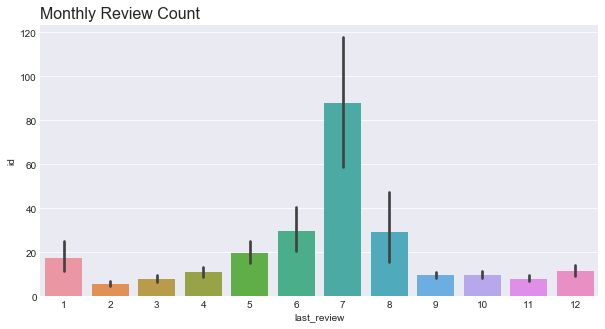

In [28]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.barplot(revs.index.month, revs) # groups date-time object by month
plt.title('Monthly Review Count', fontsize = 16, loc = 'left');

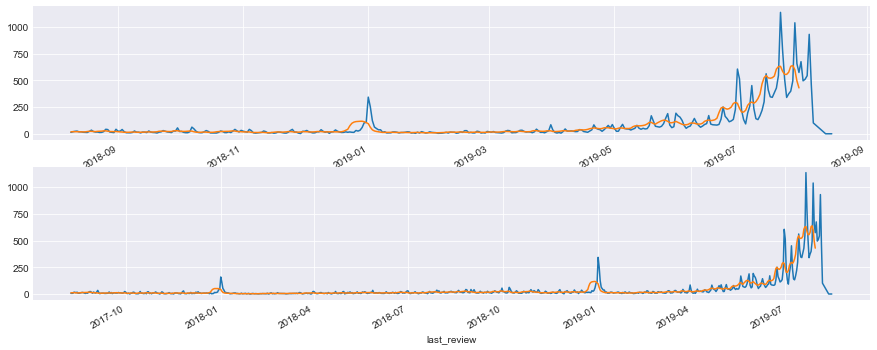

In [29]:
#plot one year of reviews
fig, ax = plt.subplots(nrows = 2, ncols = 1)
revs.head(365).plot(figsize = (15, 6), ax = ax[0])
revs.rolling(10).mean().head(365).plot(ax = ax[0])

#two years of reviews
revs.head(730).plot(figsize = (15, 6), ax = ax[1])
revs.rolling(10).mean().head(730).plot(ax = ax[1])

In [22]:
from statsmodels.tsa.stattools import adfuller

In [24]:
#last year stationary?
adfuller(revs['2018':])[1]
# based on this score we fail to accept the null hyp (ie - the data is not stationary)

0.00010634469878495352

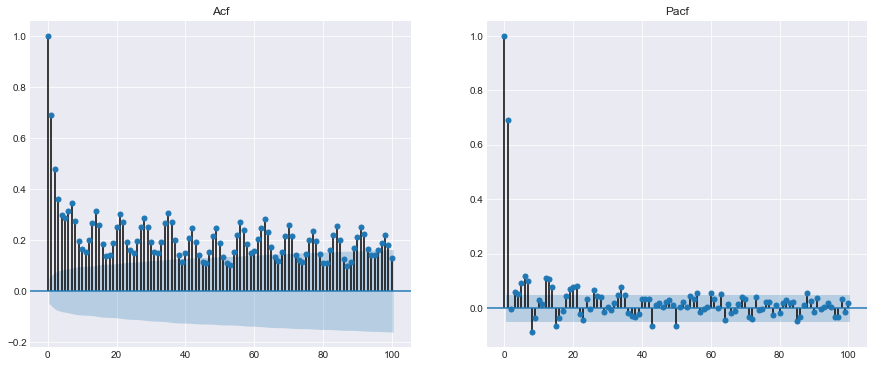

In [32]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (15, 6))
plot_acf(revs['2018':], lags = 100, ax = ax[0], title = 'Acf');

plot_pacf(revs['2018':], lags = 100, ax = ax[1], title = 'Pacf');

# we see no pattern in either partial or full autocorrelation plots